# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

***Цель исследования*** - найти интересные особенности и зависимости, которые существуют на рынке недвижимости, которые затем можно будет использовать для определения рыночной стоимости объектов, отслеживания аномалий и мошеннической деятельности.

***Ход исследования:***

Данные об объектах недвижимости мы возьмем из архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, предоставленном сервисом Яндекс Недвижимость.

Для качественного исследования нам потребуется изучить данные и выполнить их предобработку, а именно: заполнить пропуски, избавиться от дубликатов, очистить от редких и аномальных значений, добавить новые столбцы, изменить тип данных, где это потребуется.

Затем непосредственно перейдем к анализу данных и поиску интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

Таким образом, исследование пройдёт в три этапа:

- Обзор данных.
- Предобработка данных.
- Исследовательский анализ данных (поиск зависимостей).

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки pandas и matplotlib.pyplot, считаем данные из csv-файла в датафрейм 
# и сохраним в переменную data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# зададим формат вывода для вещественных чисел
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# выведем первые 20 строчек датафрейма data на экран для ознакомления с данными
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [3]:
# выведем основную информацию о датафрейме с помощью метода info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что в нашем датасете содержится 23699 записей (строк) со 22 колонками. Используемые типы данных: вещественный, целый, строковый и булевый. По некоторым колонкам имеются пропущенные значения. Вернемся к ним ниже в пункте Предобработка данных.

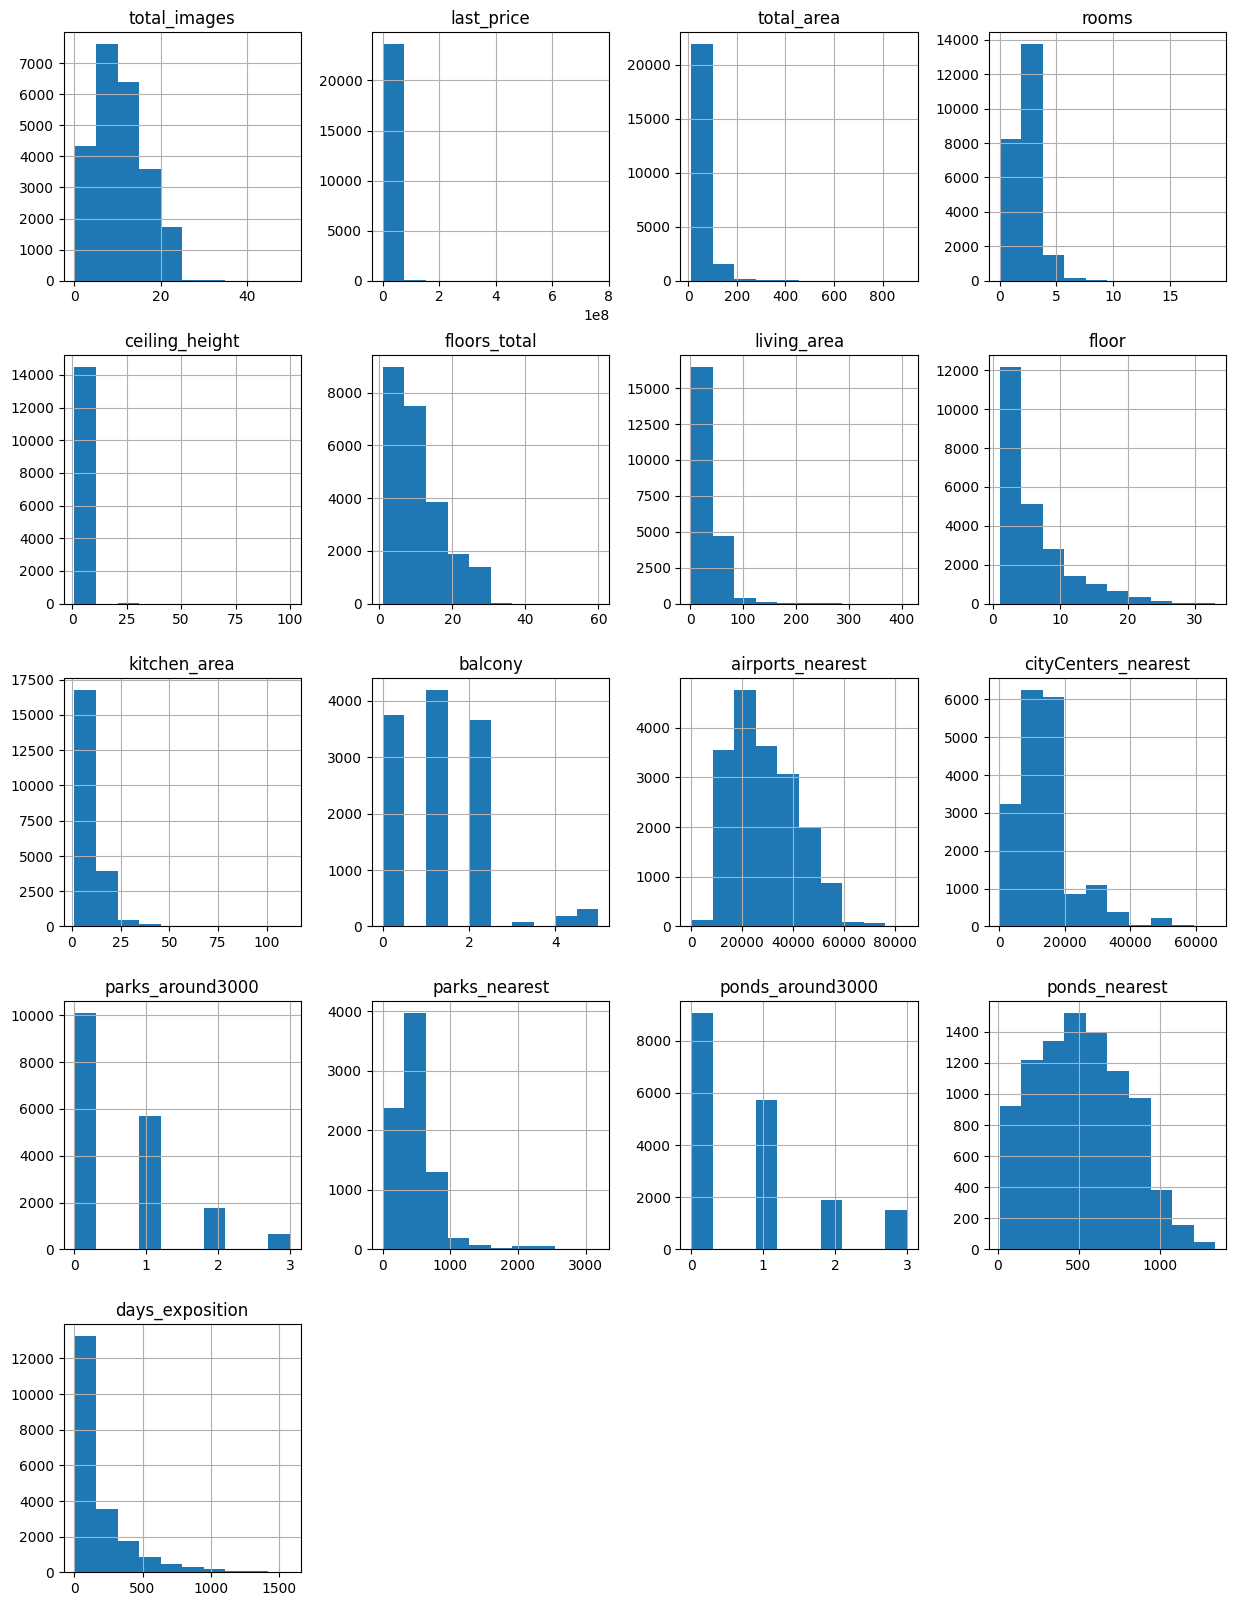

In [4]:
# построим гистрограммы для всех числовых столбцов таблицы
x = data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [5]:
# выведим количество пропущенных значений для каждого столбца
data.isna().sum()

# выведим процент пропущенных значений для каждого столбца
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Имеются пропуски в следующих колонках (по убыванию количества пропусков): is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height (высота потолков), airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, days_exposition, kitchen_area, living_area.
Ниже заполним пропущенные значения в тех колонках, где это необходимо и возможно.

#### Предбработка данных столбца  ceiling_height (высота потолков)

Рассмотрим колонку 'ceiling_height' (высота потолков). Т.к. пропусков в этой колонке довольно много (38% от всех данных), мы не можем просто взять и удалить их: это приведет к потере данных и искажению результатов исследования.

In [6]:
# изучим данные в колонке 'ceiling_height' с помощью метода describe()
data['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Видим, что минимальное значение высоты потолков - 1 метр, а максимальное - 100 метров.

In [7]:
# выведим строки с высотой потолков больше 10 метров
display(data.query('ceiling_height > 10').sort_values(by='ceiling_height'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.00,45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.00,11936.00,2.00,440.00,2.00,450.00,136.00
15061,19,5600000.00,56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,NaN,...,9.10,2.00,Санкт-Петербург,14814.00,13610.00,0.00,NaN,0.00,NaN,315.00
17496,15,6700000.00,92.90,2019-02-19T00:00:00,3,20.00,17.00,53.20,14,NaN,...,12.00,5.00,Санкт-Петербург,16295.00,15092.00,1.00,967.00,0.00,NaN,NaN
20507,12,5950000.00,60.00,2018-02-19T00:00:00,2,22.60,14.00,35.00,11,NaN,...,13.00,1.00,Санкт-Петербург,27028.00,12570.00,0.00,NaN,0.00,NaN,40.00
5076,0,3850000.00,30.50,2018-10-03T00:00:00,1,24.00,5.00,19.50,1,True,...,5.50,NaN,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7.00
355,17,3600000.00,55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,...,NaN,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00
18545,6,3750000.00,43.00,2019-03-18T00:00:00,2,25.00,5.00,29.00,3,False,...,NaN,NaN,Санкт-Петербург,27054.00,8033.00,1.00,540.00,0.00,NaN,12.00
11285,0,1950000.00,37.00,2019-03-20T00:00:00,1,25.00,5.00,17.00,4,False,...,9.00,2.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.00
9379,5,3950000.00,42.00,2017-03-26T00:00:00,3,25.00,5.00,30.00,2,NaN,...,5.20,NaN,Санкт-Петербург,11647.00,13581.00,0.00,NaN,0.00,NaN,NaN
14382,9,1700000.00,35.00,2015-12-04T00:00:00,1,25.00,5.00,20.00,2,False,...,8.00,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.00


Видим, что в значениях высоты потолков > 14 метров, скорее всего, закралась ошибка в порядке числа: 24 метра - это, вероятно, 2.4 метра. 
Исправим эту ошибку: разделим значения больше 20 метров на 10

In [8]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [9]:
# выведим значения высоты потолков меньше двух метров и больше 10 метров
display(data.query('2 > ceiling_height or ceiling_height > 10'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.00,42.80,2017-08-14T00:00:00,2,1.20,2.00,27.50,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.00
15061,19,5600000.00,56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,NaN,...,9.10,2.00,Санкт-Петербург,14814.00,13610.00,0.00,NaN,0.00,NaN,315.00
16934,5,4100000.00,40.00,2017-10-17T00:00:00,1,1.75,37.00,17.40,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,71.00
22309,20,5300000.00,45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.00,11936.00,2.00,440.00,2.00,450.00,136.00
22590,16,6000000.00,55.00,2018-10-31T00:00:00,2,1.00,12.00,32.40,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.00,14217.00,2.00,293.00,2.00,289.00,13.00


Видим, что строк с такими значениями пренебрежимо мало по сравнению с количеством "нормальных" строк (5 из 23699).

Удалим строки с аномальными значениями высоты потолков (меньше 2 и больше 10 метров) из нашего датасета.
Строки с пропусками не удаляем, их мы будем заполнять ниже

In [10]:
# удаляем аномальные строки
data = data.query('(ceiling_height.isna()) or (2 <= ceiling_height or ceiling_height <= 10)')

Мы подготовили данные в колонке 'ceiling_height' (высота потолков) к дальнейшей предобработке, а именно к заполнению пропусков. Скорее всего, пропуски в данной колонке появились из-за того, что продавец не посчитал нужным заполнить эти данные, либо ему неизвестна высота потолков в квартире, а поле не обязательно к заполнению. 

Пропущенные значения высоты потолков можно заполнить медианными значениями высоты потолков домов такой же этажности. Для этого нам нужно поготовить данные в колонке floors_total (всего этажей), а именно избавиться в них от пропусков. 

#### Предбработка данных столбца  floors_total (всего этажей)

In [11]:
# выведем строки с пропущенными значениями столбца 'floors_total'
display(data[data['floors_total'].isna()])

# и сохраним эти строки в отдельный датафрейм, чтобы после заполнения пропусков проверить,
# как изменятся данные в этих строках
data_floors_nan = data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.00,63.50,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.00,15363.00,0.00,NaN,1.00,853.00,512.00
22656,4,4574160.00,64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,127.00
22808,0,14569263.00,110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,260.00
23590,0,21187872.00,123.30,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,104.00


Таких строк в нашем датасете 86. 

Логично, что этажность дома будет как минимум не меньше этажа продаваемой квартиры. Поэтому заполним пропуски номером этажа квартиры.

In [12]:
# заполним пропущенные значения данными из колонки 'floor' (этаж)
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

# проверим, как изменились данные в этих строках
display(data.query('index in @data_floors_nan.index'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,NaN,4.00,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,NaN,1.00,20.75,1,NaN,...,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,NaN,12.00,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,NaN,8.00,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,NaN,9.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.00,63.50,2017-05-24T00:00:00,2,2.80,3.00,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.00,15363.00,0.00,NaN,1.00,853.00,512.00
22656,4,4574160.00,64.50,2017-04-02T00:00:00,2,NaN,20.00,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,127.00
22808,0,14569263.00,110.40,2016-11-20T00:00:00,3,NaN,6.00,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,260.00
23590,0,21187872.00,123.30,2017-04-25T00:00:00,3,NaN,18.00,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,104.00


Видим, что пропущенные значения столбца floors_total заменились на значения столбца floor, как и предполагалось.

Теперь мы можем заполнить отсутствующие значения в колонке 'ceiling_height' (высота потолков) медианными значениями высоты потолков домов такой же этажности.

In [13]:
# для наглядности выведем уникальные значения столбца floors_total
display(data.sort_values(by='floors_total')['floors_total'].unique())

# заполним пропуски в колонке 'ceiling_height' медианными значениями высоты потолков домов такой же этажности
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

# проверим, остались ли еще пропуски в колонке 'ceiling_height'
data[data['ceiling_height'].isna()]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60.])

C:\Users\lexus\anaconda3\envs\practicum\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.00,101.00,2016-04-28T00:00:00,3,NaN,33.00,53.00,32,False,...,21.00,0.00,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,53.00


В одной строке остался пропуск, так как это единственный объект недвижимости, расположенный в доме такой этажности (33) в нашем датасете. Поэтому для него не получилось вычислить медиану, и, соотвественно, заполнить пропуск.
Для заполнения пропуска возьмем медианное значение высоты потолков домов, близких по этажности (+/- 2 этажа)

In [14]:
# заполним пропуски в колонке 'ceiling_height' медианными значениями высоты потолков домов близкой этажности (+\- 2 этажа)
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[((t - 2) <= data['floors_total']) & (data['floors_total'] <= (t + 2)), 'ceiling_height'].median()

# проверим, остались ли еще пропуски в колонке 'ceiling_height'
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь пропусков в колонке ceiling_height нет, переходим к следующему пункту.

#### Предбработка данных столбца living_area (жилая площадь)

In [15]:
# выведим строки с пропущенными значениями столбца 'living_area'
display(data[data['living_area'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.60,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,2.75,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,2.55,9.00,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,2.75,22.00,NaN,3,NaN,...,NaN,1.00,Санкт-Петербург,30471.00,11603.00,1.00,620.00,1.00,1152.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.00,80.30,2018-07-03T00:00:00,3,2.70,12.00,NaN,5,NaN,...,NaN,NaN,Колпино,27933.00,33719.00,0.00,NaN,2.00,562.00,60.00
23663,12,6400000.00,88.00,2018-01-12T00:00:00,4,2.55,10.00,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.00,13943.00,0.00,NaN,2.00,844.00,59.00
23670,9,2450000.00,45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,2500000.00,35.00,2017-12-08T00:00:00,1,2.55,9.00,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00


Данный столбец имеет большое влияние на цену недвижимости, поэтому важно по возможности восстановить пропущенные значения используя имеющиеся данные.

Проверим, есть ли взаимосвязь между значениями жилой площади 'living_area' и значениями общей площади 'total_area'. Для этого рассчитаем коэффициент корреляции с помощью метода corr() (из расчета исключим пустые значения) 

In [16]:
print(data[~data['living_area'].isna()]['living_area'].corr(data[~data['total_area'].isna()]['total_area']))

0.9395373338721493


Коэффициент корреляции близок к 1, а, значит, есть тесная линейная связь между 'living_area' и 'total_area'. 
Зная отношение этих двух величин, мы сможем заполнить пропуски в колонке 'living_area' (жилая площадь).

In [17]:
# рассчитаем отношение жилой площади к общей: найдем медианное значение не пустых значений колонки living_area и поделим
# его на медианное значение не пустых значений колонки 'total_area', результат сохраним в переменной koef_living_total
koef_living_total = data[~data['living_area'].isna()]['living_area'].median() \
    / data[~data['total_area'].isna()]['total_area'].median()

print(koef_living_total)

0.5769230769230769


Используем этот коэффициент для заполнения пропущенных значений колонки 'living_area': жилую площадь 'living_area' будем рассчитывать как общую площадь 'total_area', умноженную на коэффициент koef_living_total

In [18]:
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] * koef_living_total

In [19]:
# убедимся, что пропуски в колонке 'living_area' заполнены
display(data['living_area'].isna().sum())

0

#### Предбработка данных столбца balcony (балконы)

In [20]:
# посчитаем количество строк с незаполненными значениями в столбце balcony
data['balcony'].isna().sum()

11519

Таких записей довольно много. Посмотрим, какие значения всречаются в этом столбце

In [21]:
# посмотрим уникальные значения столбца 'balcony' (балконы)
display(data['balcony'].unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Видим, что в продаваемых квартирах балконы либо отсутствуют, либо их количество варьируется от 1 до 5. 

Можем предположить, если число балконов не указано, то, скорее всего, в квартире их нет. Такие пропуски можно заменить на 0

In [22]:
# если число балконов не указано, то, скорее всего, в квартире их нет. Такие пропуски можно заменить на 0
data['balcony'] = data['balcony'].fillna(0)

In [23]:
# убедимся, что пропуски в колонке 'balcony' заполнены
display(data['balcony'].isna().sum())

0

#### Предбработка данных столбца is_apartment (апартаменты)

В колонке is_apartment (апартаменты) помимо значений True и False встречается большое число пропусков. Избавимся от них: заменим все NaN на False

In [24]:
# выведим уникальные значения колонки is_apartment
print(data['is_apartment'].unique())

# заменим все пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)

# убедимся, что теперь в данной колонке всего 2 значения: False и True
print(data['is_apartment'].unique())

[nan False True]
[False  True]


#### Предбработка данных столбца locality_name (название населенного пункта)

In [25]:
# заменим пропуски в колонке locality_name на 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

# убедимся, что теперь в колонке отсутсвуют пропуски
display(data['locality_name'].isna().sum())

0

#### Предбработка данных столбца kitchen_area (площадь кухни)

In [26]:
# выведем строки с пропущенными значениями столбца 'kitchen_area'
display(data[data['kitchen_area'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.60,14.00,91.73,9,False,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,2.55,9.00,18.92,2,False,...,NaN,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,1990000.00,45.80,2017-10-28T00:00:00,2,2.50,5.00,26.42,1,False,...,NaN,0.00,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,2.75,22.00,23.08,3,False,...,NaN,1.00,Санкт-Петербург,30471.00,11603.00,1.00,620.00,1.00,1152.00,NaN
59,15,6300000.00,46.50,2017-03-06T00:00:00,1,2.70,13.00,26.83,13,False,...,NaN,0.00,Санкт-Петербург,11125.00,14501.00,0.00,NaN,0.00,NaN,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.00,40.50,2016-09-08T00:00:00,1,2.56,18.00,19.60,10,False,...,NaN,0.00,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.00
23663,12,6400000.00,88.00,2018-01-12T00:00:00,4,2.55,10.00,50.77,1,False,...,NaN,0.00,Санкт-Петербург,33642.00,13943.00,0.00,NaN,2.00,844.00,59.00
23670,9,2450000.00,45.60,2018-02-08T00:00:00,1,2.80,9.00,26.31,2,False,...,NaN,0.00,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23679,0,2500000.00,35.00,2017-12-08T00:00:00,1,2.55,9.00,20.19,4,False,...,NaN,0.00,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00


Если рассуждать логически, то можно предположить, что площадь кухни должна зависеть от общей площади квартиры, от жилой площади и от нежилой площади. Рассчитаем коэффициенты корреляции с этими величинами.

In [27]:
data[~data['kitchen_area'].isna()]['kitchen_area'].corr(data[~data['total_area'].isna()]['total_area'])

0.6091211711198316

In [28]:
data[~data['kitchen_area'].isna()]['kitchen_area'].corr(data[~data['living_area'].isna()]['living_area'])

0.43637144149774937

In [29]:
data[~data['kitchen_area'].isna()]['kitchen_area'].corr(
    data[~data['total_area'].isna()]['total_area'] - data[~data['living_area'].isna()]['living_area']
)

0.7298348113210783

Видим, что наибольший коэффициент корреляции между площадью кухни и нежилой площадью. Используем этот коэффициент для расчета площади кухни

In [30]:
koef_kitchen_area = data[~data['kitchen_area'].isna()]['kitchen_area'].median() \
    / (data[~data['total_area'].isna()]['total_area'].median() - data[~data['living_area'].isna()]['living_area'].median())

koef_kitchen_area

0.41363636363636364

In [31]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (data['total_area'] - data['living_area']) * koef_kitchen_area

In [32]:
# убедимся, что пропуски в колонке 'kitchen_area' заполнены
display(data['kitchen_area'].isna().sum())

0

Т.о., мы заполнили все пропуски в колонках, которые возможно было заполнить на основе представленных в датасете данных

In [33]:
# посмотрим, как изменилось количество пропусков в датафрейме
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в других колонках (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) касаются географического расположения объекта недвижимости, которые мы не можем заполнить на основе имеющихся данных. Пропуски данных в колонке days_exposition пока оставим без изменений.

#### Изменение типа данных колонок

In [34]:
# изменим тип данных колонки first_day_exposition на datetime (2019-03-07T00:00:00)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# для проверки выведим на экран первые 5 строк датасета
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.75,11.00,18.60,1,False,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20,2,2.55,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24,3,2.60,14.00,91.73,9,False,...,27.83,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [35]:
# тип данных столбца floors_total (всего этажей) заменим на целый (int)
data['floors_total'] = data['floors_total'].astype('int')

In [36]:
# столбец is_apartment содержит только 2 уникальных значения, поэтому его тип можно изменить на логический (bool)
data['is_apartment'] = data['is_apartment'].astype('bool')

In [37]:
# изменим тип данных колонки locality_name на строковый (str)
data['locality_name'] = data['locality_name'].astype('str')

In [38]:
# тип данных столбца balcony (балконы) заменим на целый (int)
print(data['balcony'].unique())
data['balcony'] = data['balcony'].astype('int64') 

[0. 2. 1. 5. 4. 3.]


In [39]:
# посмотрим, как изменился тип данных в датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Поиск дубликатов

In [40]:
# проверим датасет на наличие явных дубликатов
data.duplicated().sum()

0

Изучим уникальные значения в столбце с названиями населенного пункта 'locality_name'.
Очищенные от дубликатов данные будем сохранять в отдельный столбец 'locality_name_clean'. Пока перенесем в него данные из столбца 'locality_name'.

In [41]:
# выведим количество явных дубликатов в колонке 'locality_name'
print('Количество явных дубликатов', data['locality_name'].duplicated().sum())

# выведим количество уникальный названий в колонке 'locality_name'
print('Количество уникальный названий', len(data['locality_name'].unique()))
#sorted(data['locality_name'].unique())
data['locality_name_clean'] = data['locality_name']

Количество явных дубликатов 23334
Количество уникальный названий 365


In [42]:
# избавимся от неявных дубликатов в названиях («поселок Рябово» и «поселок городского типа Рябово» - одно и то же)
# создадим список с дубликатами типа населенного пункта
duplicates = (['посёлок', 'поселок', 'поселок городского типа', 'посёлок городского типа', \
     'городской поселок', 'городской посёлок', 'коттеджный поселок', 'коттеджный посёлок'])
replacement = 'поселок'

# в колонке 'locality_name_clean' заменим типы населенного пункта, которые есть в списке duplicates, на тип 'поселок'
#data['locality_name_clean'] = data['locality_name_clean'].replace(duplicates, replacement, regex=True)
for name in duplicates:
    data['locality_name_clean'] = data['locality_name_clean'].str.replace(name, replacement)

# проверим, как изменилось количество уникальных значений колонки 'locality_name'
print('Количество уникальных названий', len(data['locality_name_clean'].unique()))

Количество уникальных названий 322


Т.о. нам удалось избавиться от 143 (365-322) неявных дубликата в названиях населенных пунктов.

In [43]:
# посмотрим, как теперь выглядят уникальные значения в колонке locality_name_clean
# sorted(data['locality_name_clean'].unique())

#### Очистка данных от редких и аномальных значений

Для некоторых колонок мы уже нашли и удалили редкие и выбивающиеся значения. Например, для колонки ceiling_height (высота потолков) мы отсекли значения меньше 2 метров и больше 10 метров, когда заполняли в ней пропуски.
Рассмотрим остальные колонки на наличие редких и аномальных значений.

In [44]:
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [45]:
# выведим строки с минимальным и максимальным значениями колонки last_price (последняя цена)
display(data[data['last_price'] == data['last_price'].min()])
display(data[data['last_price'] == data['last_price'].max()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clean
8793,7,12190.00,109.00,2019-03-20,2,2.75,25,32.00,25,False,...,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00,Санкт-Петербург


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clean
12971,19,763000000.00,400.00,2017-09-30,7,2.60,10,250.00,10,False,...,2,Санкт-Петербург,25108.00,3956.00,1.00,530.00,3.00,756.00,33.00,Санкт-Петербург


В строке с минимальным значением стоимости объекта недвижимости явно закралась ошибка: не может объект площадью 109 квадратов в Санкт-Петербурге стоить 12 тысяч 190 рублей. Удалим эту строку. Строку с максимальной стоимостью 763 миллиона рублей тоже исключим из датасета, т.к. она явно выбивается из общей массы (медиана 4 650 000).

In [46]:
data = data[(data['last_price'] != data['last_price'].min()) & (data['last_price'] != data['last_price'].max())]

# снова выведим строки с минимальным и максимальным значениями колонки last_price (последняя цена)
display(data[data['last_price'] == data['last_price'].min()])
display(data[data['last_price'] == data['last_price'].max()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clean
14911,5,430000.00,54.00,2018-06-26,2,2.80,3,31.15,3,False,...,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00,поселок станции Свирь
17456,7,430000.00,30.40,2019-04-22,1,2.70,2,16.00,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сланцы


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_clean
19540,8,420000000.00,900.00,2017-12-06,12,2.80,25,409.70,25,False,...,0,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106.00,Санкт-Петербург


Остальные значения колонки last_price выглядят более менее правдободобно, оставим их.

In [47]:
# посмотрим числовые описания данных остальных колонок
print(data['total_area'].describe(), end=2*'\n')
print(data['rooms'].describe(), end=2*'\n')
print(data['living_area'].describe(), end=2*'\n')    
print(data['kitchen_area'].describe())

count   23697.00
mean       60.33
std        35.59
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64

count   23697.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

count   23697.00
mean       34.62
std        22.34
min         2.00
25%        19.00
50%        30.00
75%        42.17
max       409.70
Name: living_area, dtype: float64

count   23697.00
mean       10.48
std         6.05
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64


Серьезных аномалий не выявили, оставим данные без изменений.

***Вывод:***

Для качественного исследования нам требовалось изучить данные и выполнить их предобработку, а именно: заполнить пропуски, избавиться от дубликатов, очистить от редких и аномальных значений и изменить тип данных, где это требовалось.


Мы заполнили пропуски в колонках floors_total, ceiling_height, living_area, balcony, is_apartment, locality_name. Причем, для заполнения пропусков в столбцах ceiling_height и living_area мы использовали имеющиеся в датасете величины. То есть находили закономерности для известных и искомых величин, а затем использовали эту закокномерность для рассчета пропущенных значений.  


Пропуски в других колонках (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) касаются географического расположения объекта недвижимости, которые мы не можем заполнить на основе имеющихся данных, поэтому оставили их без изменений.


Возможными причинами появления пропусков могли быть: невнимательность продавца при вводе данных, нежелание продавца указывать эти данные, недостаток информации об объекте недвижимости (например, продавец не знает высоту потолков в квартире), необязательное поле для ввода данных.


Также мы изменили тип даных в некоторых столбцах: вещественный тип в колонках floors_total и balcony заменили на целый, а в коллонках is_apartment и locality_name на логический и строковый соответственно.


Важным и кропотливым этапом была очистка данных от дубликатов. Благодаря обработке данных мы смогли снизить количество уникальных значений в колонке locality_name с 365 до 319. 

Последним этапом предобработки была очистка данных от редких и аномальных значений. Мы удалили крайние значения столбца last_price, так как эти данные могли исказить результаты дальнейшего исследования.

### Посчитайте и добавьте в таблицу новые столбцы

#### Посчитаем и добавим в таблицу цену одного квадратного метра

In [48]:
data['price_square_meter'] = data['last_price'] / data['total_area']

#### Посчитаем и добавим в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [49]:
data['week_day'] = data['first_day_exposition'].dt.weekday

#### Посчитаем и добавим в таблицу месяц публикации объявления

In [50]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month  # data['first_day_exposition'].astype('datetime64[M]') если важен год

#### Посчитаем и добавим в таблицу год публикации объявления

In [51]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

####  Посчитаем и добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)

In [52]:
# напишем функцию, которая возвращает тип этажа
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# вызовим функцию, возвращающую тип этажа, для датасета
data['floor_type'] = data.apply(floor_type, axis=1)

#### Посчитаем и добавим в таблицу расстояние в км до центра города

In [53]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_clean,price_square_meter,week_day,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,0.00,NaN,81.00,поселок Шушары,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3,2.60,14,91.73,9,False,...,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,2018,другой,8.00


***Вывод:***

Для дальнейшего исследования данных мы добавили столбцы с дополнительной информацией: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Построим гистограммы для каждого параметра

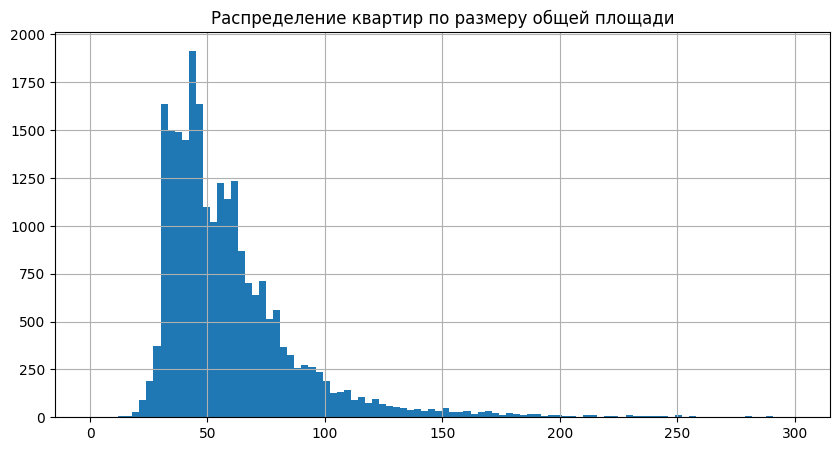

In [54]:
data['total_area'].hist(bins=100, range=(0, 300), figsize=(10, 5))
plt.title('Распределение квартир по размеру общей площади')
plt.show()

На графике видно, что чаще всего выставляются на продажу квартиры общей площадью около 45 кв.м. Это могут быть как современные однокомнатные квартиры большей площади, так и старые малогабаритные двушки-хрущевки. Следующий пик по частоте приходится на площадь около 30 кв.м. Сюда можно отнести классические однокомнатные квартиры. Третий пик - на уровне 60-65 кв.м - это, вероятно, трехкомнатные квартиры. Затем количество выставленных на продажу квартир площадью больше 65 кв.м начинает плавно снижаться.

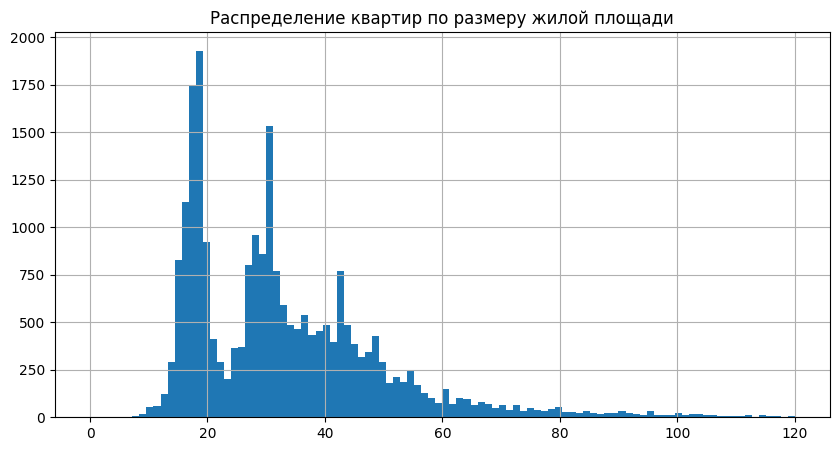

In [55]:
data['living_area'].hist(bins=100, range=(0, 120), figsize=(10, 5))
plt.title('Распределение квартир по размеру жилой площади')
plt.show()

На данном графике также прослеживается три пика, как и на предыдущем графике. Вероятно, эти пики соответсвуют жилым площадям 1-, 2-, 3-хкомнатных квартир. На гистограмме видно, что чаще всего продаются объекты недвижимости, у которых жилая площадь составляет 16-19 квадратных метров (студии. однушки). Второй по частоте идут квартиры с жилой площадью около 30 кв м. Третий пик - квртиры с жилой площадью чуть больше 40 кв.м.

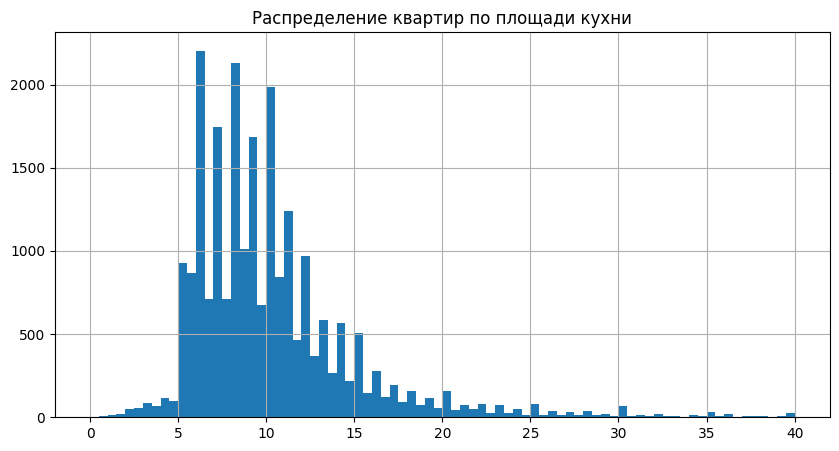

In [56]:
data['kitchen_area'].hist(bins=80, range=(0, 40), figsize=(10, 5))
plt.title('Распределение квартир по площади кухни')
plt.show()

Судя по графику, чаще всего продаваемые квартиры имеют плошадь кухни от 6 до 11 кв м. Причем, наиболее часто встречающаяся площадь кухни - 6 км м, затем - 8 кв м, далее - 10 кв м. Интересный момент: квартир с площадью кухни менее 5 кв.м продается очень мало, даже меньше, чем с площадью кухни 15-20 кв м.

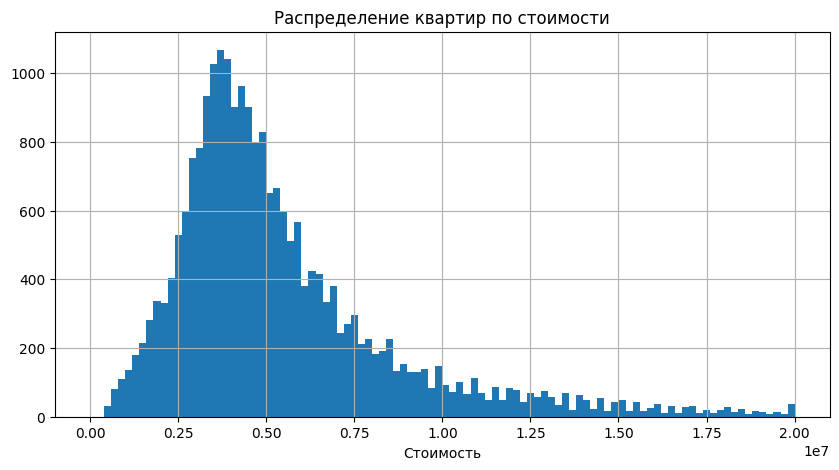

In [57]:
data['last_price'].hist(bins=100, range=(0, 20000000), figsize=(10, 5))
plt.title('Распределение квартир по стоимости')
plt.xlabel('Стоимость')
plt.show()

На данном графике мы четко видим один пик, т.е. чаще всего выставляются квартиры стоимостью 4 млн.рублей. Распределение по форме похоже на колокол, то есть является нормальным.

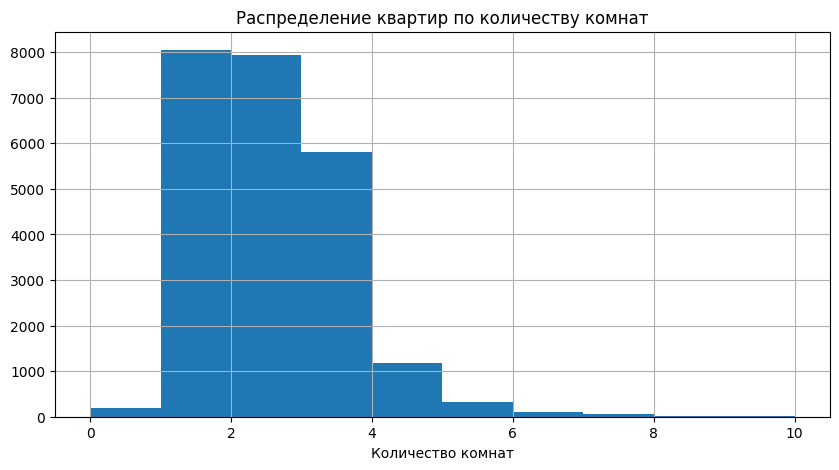

In [58]:
data['rooms'].hist(bins=10, range=(0, 10), figsize=(10, 5))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.show()

По графику видно, что чаще всего продаются однокомнатные и двухкомнатные квартиры, трехкомнатные реже, а четырехкомнатные квартиры продаются еще реже: в 4 раза меньше, чем трехкомнатные.

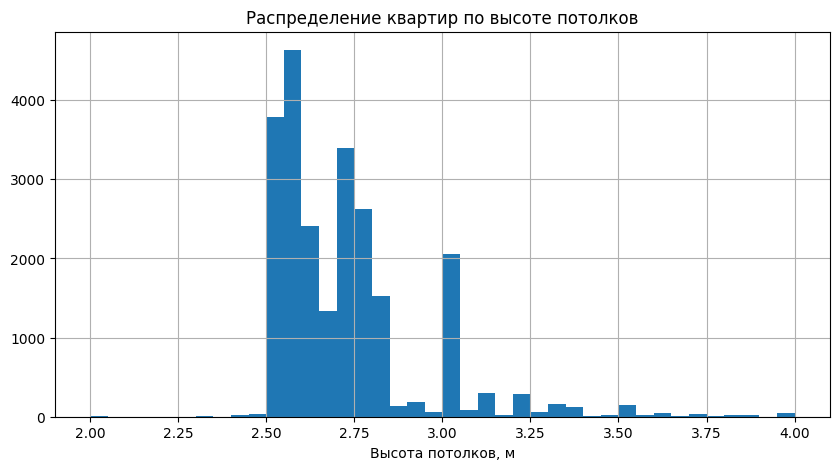

In [59]:
data['ceiling_height'].hist(bins=40, range=(2, 4), figsize=(10, 5))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.show()

По графику можно сказать, что у продаваемых квартир чаще всего встречается высота потолков 2.5 - 2.6 метров. Затем по частоте идут квартиры с высотой потолков 2.7 - 2.8 метров.

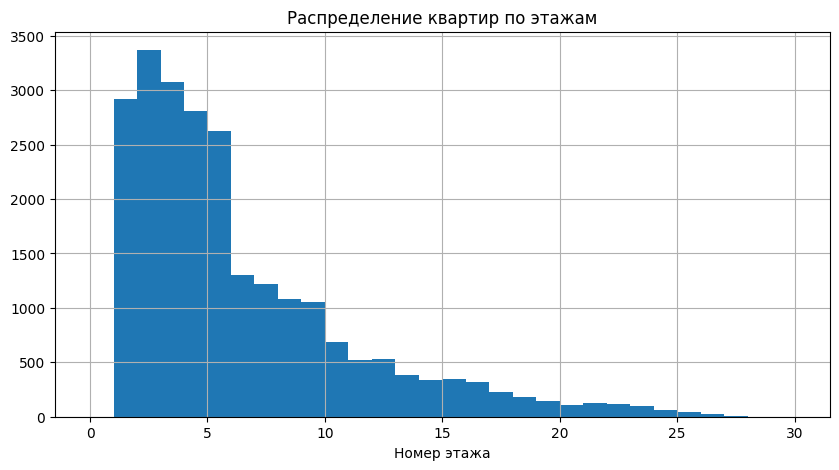

In [60]:
data['floor'].hist(bins=30, range=(0, 30), figsize=(10, 5))
plt.title('Распределение квартир по этажам')
plt.xlabel('Номер этажа')
plt.show()

На графике видно, что чаще всего продаются квартиры, расположенные на 2, 3, 1, 4, 5 этажах, что вполне логично, так как эти этажи встречаются как в пятиэтажных домах, так и в более высоких.

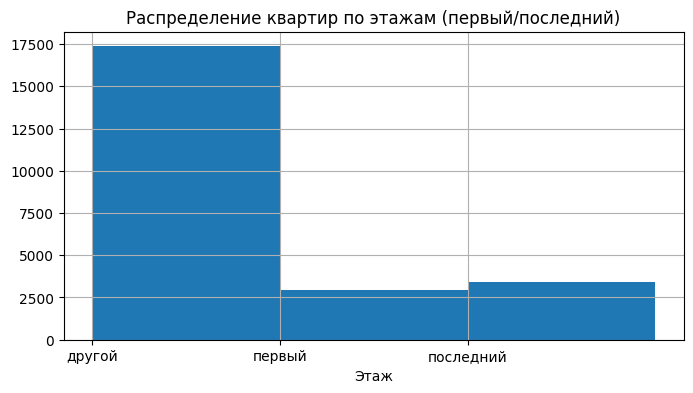

In [61]:
data['floor_type'].hist(bins=3, range=(0, 3), figsize=(8, 4))
plt.title('Распределение квартир по этажам (первый/последний)')
plt.xlabel('Этаж')
plt.show()

На гистограмме видно, что реже всего продают квартиры на 1 этаже, затем на последнем, а чаще всего - на любом другом этаже.

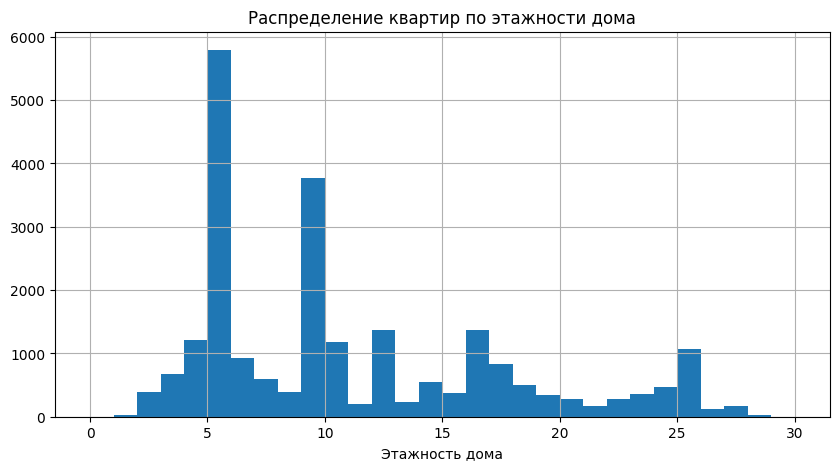

In [62]:
data['floors_total'].hist(bins=30, range=(0, 30), figsize=(10, 5))
plt.title('Распределение квартир по этажности дома')
plt.xlabel('Этажность дома')
plt.show()

На графике наглядно продемонстрировано, что чаще всего продаются квартиры в пятиэтажных домах, чуть реже - в девятиэтажных. Действительно. 5- и 9-этажные дома - самые распространенные типы многоэтажных домов в нашей стране.

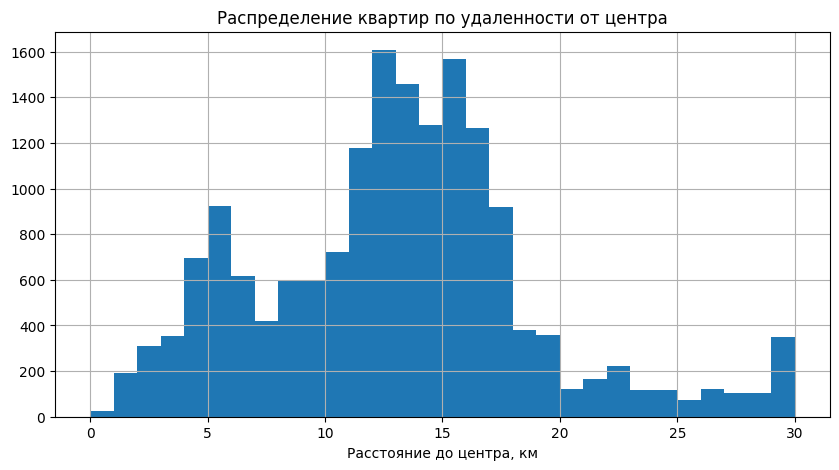

In [63]:
data['cityCenters_nearest_km'].hist(bins=30, range=(0, 30), figsize=(10, 5))
plt.title('Распределение квартир по удаленности от центра')
plt.xlabel('Расстояние до центра, км')
plt.show()

На гистограмме можно выделить часто встречающийся диапазон расстояний до центра города: это 11-17 км, а самые часто встречающиеся расстояния - это 12-14 и 15-16 км от центра города. Также можно отметить еще один пик - 4-5 км до центра города.

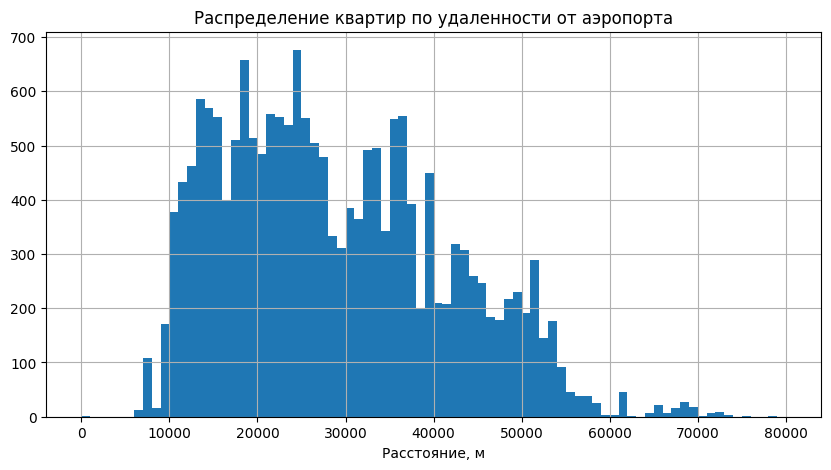

In [64]:
data['airports_nearest'].hist(bins=80, range=(0, 80000), figsize=(10, 5))
plt.title('Распределение квартир по удаленности от аэропорта')
plt.xlabel('Расстояние, м')
plt.show()

По графику можно сказать, что ближайший аэропорт большинства продваемых квартир почти наверняка находится на расстоянии до 60 км. Причем, чаще всего аэропорт расположен в диапазоне 10-28 км от города, с пиками на 18 и 24 км.

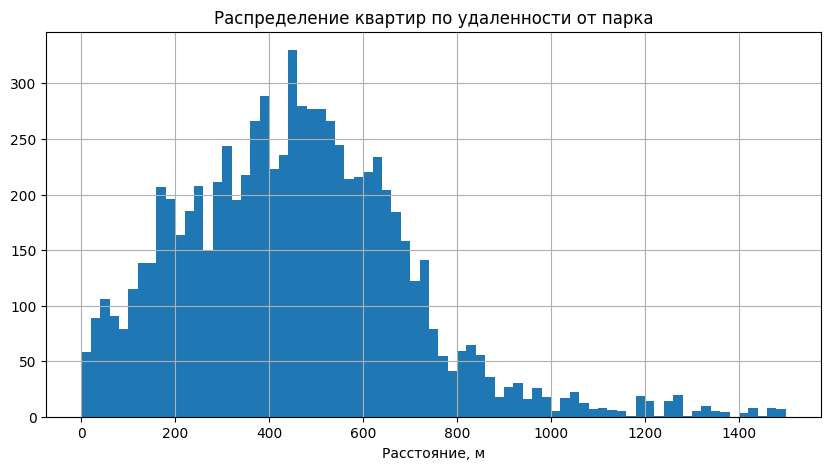

In [65]:
data['parks_nearest'].hist(bins=75, range=(0, 1500), figsize=(10, 5))
plt.title('Распределение квартир по удаленности от парка')
plt.xlabel('Расстояние, м')
plt.show()

На графике видно, что ближайший парк чаще всего находится на расстоянии до 800 метров от объекта недвижимости. Причем, чаще всего парк находится в пешей доступности - примерно в 500 метрах от дома.

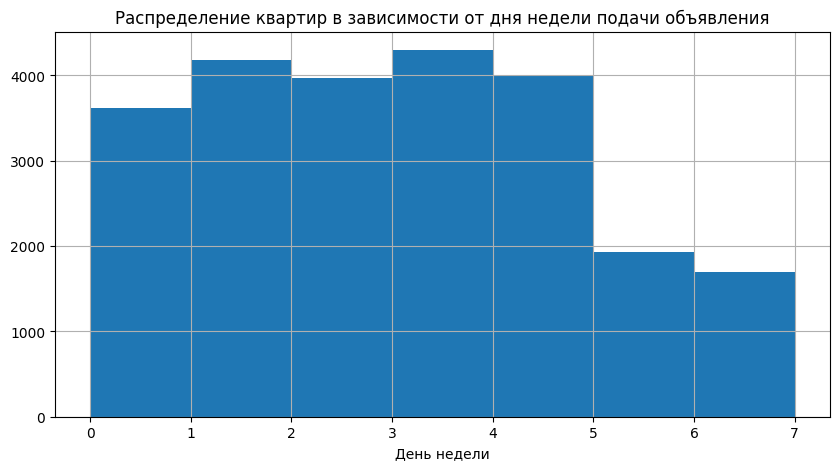

In [66]:
data['week_day'].hist(bins=7, range=(0, 7), figsize=(10, 5))
plt.title('Распределение квартир в зависимости от дня недели подачи объявления')
plt.xlabel('День недели')
plt.show()

По гистрограмме частот сразу понятно, что чаще всего объявления о продаже объекта недвижимости появляются в будни дни. В выходные - в 2 раза реже.

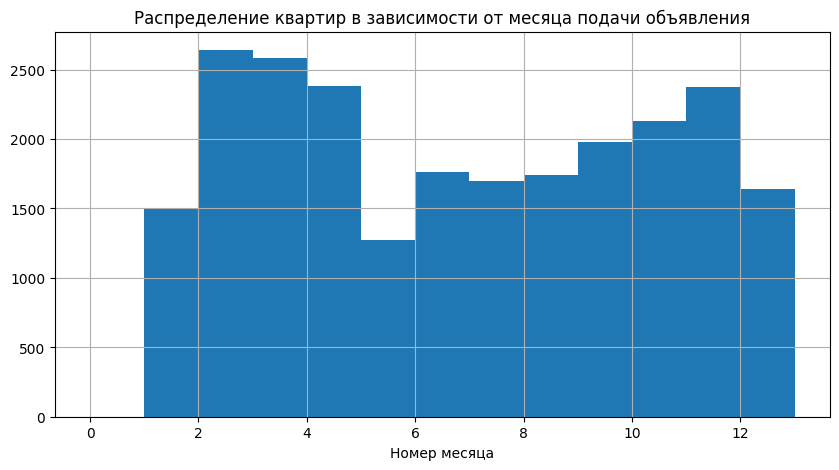

In [67]:
data['month_exposition'].hist(bins=13, range=(0, 13), figsize=(10, 5))
plt.title('Распределение квартир в зависимости от месяца подачи объявления')
plt.xlabel('Номер месяца')
plt.show()

На данном графике видно, что больше всего объявлений о продаже квартир появляется с февраля по апрель, затем идет резкое снижение в мае и постепенный подъем с июня до ноября включительно. В декабре и январе снова наблюдается снижение количества подаваемых объявлений.

Построив и изучив гистограммы для каждого параметра мы пришли к следующим ***выводам***:
- Общая площадь: на графике видно, что чаще всего выставляются на продажу квартиры общей площадью около 45 кв.м. Это могут быть как современные однокомнатные квартиры, так и старые малогабаритные двушки-хрущевки. Следующий пик по частоте приходится на площадь около 30 кв.м. Сюда можно отнести однокомнатные квартиры. Третий пик - на уровне 60-65 кв.м - это, вероятно, трехкомнатные квартиры. Затем количество выставленных на продажу квартир площадью больше 65 кв.м начинает плавно снижаться.
- Жилая площадь: на данном графике также прослеживается три пика, как и на предыдущем графике. Вероятно, эти пики соответсвуют жилым площадям 1-, 2-, 3-хкомнатных квартир. На гистограмме видно, что чаще всего продаются объекты недвижимости, у которых жилая площадь составляет 15-19 квадратных метров (студии. однушки). Второй по частоте идут квартиры с жилой площадью около 30 кв м. Третий пик - квртиры с жилой площадью чуть больше 40 кв.м.
- Площадь кухни: на этом графике также бросаются в глаза три пика. Чаще всего продаются квартиры площадью кухни 8 кв.м. Чуть реже - площадью кухни 7 кв.м, после них - площадью кухни 11 кв.м. Количество квартир с площадью кухни менее 6 кв.м резко уменьшается, а меньше 5 кв.м - стремится к нулю.
- Последняя цена: на данном графике мы четко видим один пик, т.е. чаще всего выставляются квартиры стоимостью 4 млн.рублей. Распределение по форме похоже на колокол, то есть является нормальным.
- Количество комнат: по графику видно, что чаще всего продаются однокомнатные и двухкомнатные квартиры, трехкомнатные реже, а четырехкомнатные квартиры продаются еще реже: в 4 раза меньше, чем трехкомнатные.
- Высота потолков: по графику можно сказать, что у продаваемых квартир чаще всего встречается высота потолков 2.5 - 2.6 метров. Затем по частоте идут квартиры с высотой потолков 2.7 - 2.8 метров.
- Этаж: на графике видно, что чаще всего продаются квартиры, расположенные на 2, 3, 1, 4, 5 этажах, что вполне логично, так как эти этажи встречаются как в пятиэтажных домах, так и в более высоких.
- Тип этажа: на гистограмме видно, что реже всего продают квартиры на 1 этаже, затем на последнем, а чаще всего - на любом другом этаже.
- Всего этажей: на графике наглядно продемонстрировано, что чаще всего продаются квартиры в пятиэтажных домах, чуть реже - в девятиэтажных. Действительно. 5- и 9-этажные дома - самые распространенные типы многоэтажных домов в нашей стране.
- Расстояние до центра города в км: на гистограмме можно выделить часто встречающийся диапазон расстояний до центра города: это 11-17 км, а самые часто встречающиеся расстояния - это 12-13 и 15-16 км от центра города.
- Расстояние до ближайшего аэропорта: по графику можно сказать, что ближайший аэропорт продваемых квартир почти наверняка находится на расстоянии до 60 км. Причем, чаще всего аэропорт расположен в диапазоне 11-28 км от города, с пиками на 18 и 25 км.
- Расстояние до ближайшего парка: на графике видно, что ближайший парк чаще всего находится на расстоянии до 800 метров от объекта недвижимости. Причем, чаще всего парк находится в пешей доступности - примерно в 500 метрах от дома.
- Чаще всего объявления о продаже объекта недвижимости появляются в будни дни. В выходные - в 2 раза реже.
- Больше всего объявлений о продаже квартир появляется с февраля по апрель, затем идет резкое снижение в мае и постепенный подъем с июня до ноября включительно. В декабре и январе снова наблюдается снижение количества подаваемых объявлений.

#### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

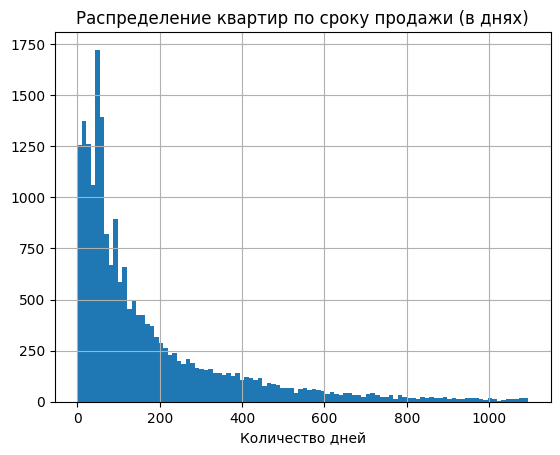

In [68]:
# построим гистограмму
data['days_exposition'].hist(bins=100, range=(0, 1095))
plt.title('Распределение квартир по сроку продажи (в днях)')
plt.xlabel('Количество дней')
plt.show()

In [69]:
# медиану и среднее значение определим с помощью метода describe()
data['days_exposition'].describe()

count   20516.00
mean      180.90
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Обычно продажа занимает от 0 до 514 дней. Это количество дней мы получили используя межквартильный размах: 
232 - 45 = 188 - межквартильный размах, 232 + 1,5 * 188 = 514 - правая граница "уса".
Продажи до 45 дней можно считать быстрыми, а свыше 232 дней - необычно долгими.

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Коэффициент корреляции 0.7026587707143953


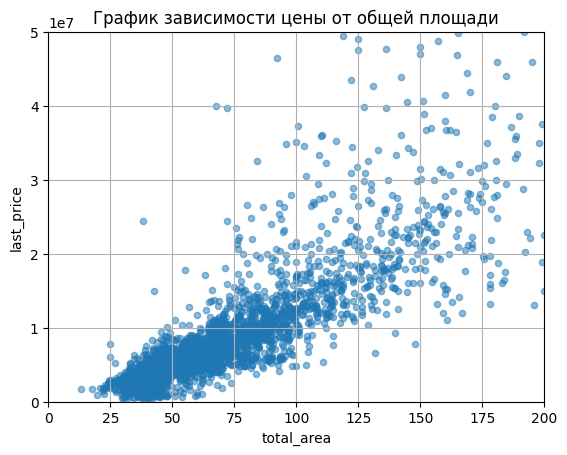

In [70]:
# коэффициент корреляции между ценой и общей площадью
print('Коэффициент корреляции ' + str(data['last_price'].corr(data['total_area'])))
(
# построим график зависимости цены от общей площади
data.pivot_table(index='last_price', values='total_area').reset_index()
    .plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, xlim=(0, 200), ylim=(0, 50000000), grid=True)
)
plt.title('График зависимости цены от общей площади')
plt.show()

На графике видна прямая зависимость цены от общей площади: чем больше площадь, тем выше цена объекта недвижимости. Коэффициент корреляции также подтверждает взаимосвязь этих величин.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

Коэффициент корреляции 0.6261870777047307


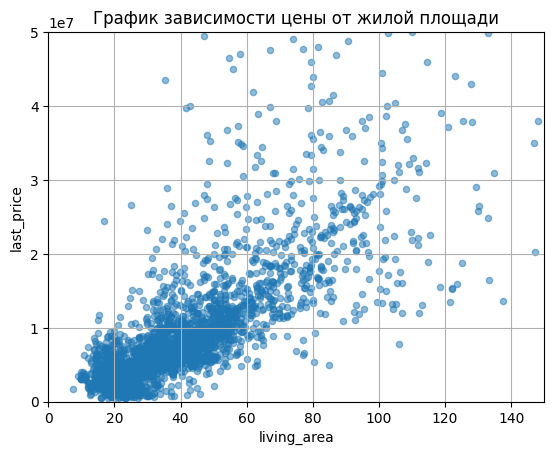

In [71]:
# коэффициент корреляции между ценой и жилой площадью
print('Коэффициент корреляции ' + str(data['last_price'].corr(data['living_area'])))
(
# построим график зависимости цены от жилой площади
data.pivot_table(index='last_price', values='living_area').reset_index()
    .plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, xlim=(0, 150), ylim=(0, 50000000), grid=True)
)
plt.title('График зависимости цены от жилой площади')
plt.show()

На графике видна прямая зависимость цены от жилой площади (хоть и чуть менее выраженная, чем для предыдущего графика): чем больше площадь, тем выше цена объекта недвижимости. Коэффициент корреляции также подтверждает взаимосвязь этих величин.

Коэффициент корреляции 0.5405036121246428


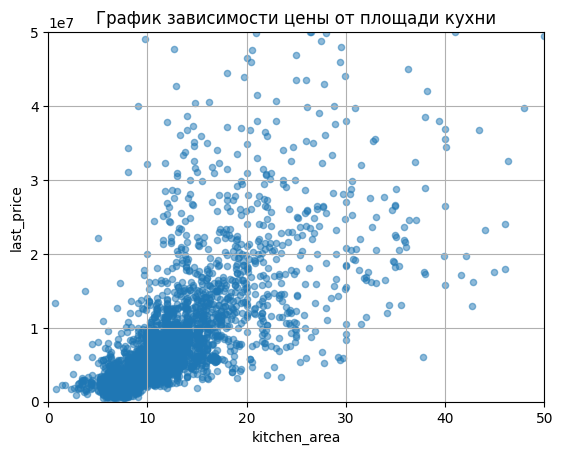

In [72]:
# коэффициент корреляции между ценой и площадью кухни
print('Коэффициент корреляции ' + str(data['last_price'].corr(data['kitchen_area'])))
(
# построим график зависимости цены от площади кухни
data.pivot_table(index='last_price', values='kitchen_area').reset_index()
    .plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, xlim=(0, 50), ylim=(0, 50000000), grid=True)
)
plt.title('График зависимости цены от площади кухни')
plt.show()

На графике видна прямая зависимость цены от площади кухни: чем больше площадь, тем выше цена объекта недвижимости. Коэффициент корреляции также подтверждает взаимосвязь этих величин. Эта вязь слабее, чем для двух предыдущих величин, но тем не менее имеет место быть.

Коэффициент корреляции 0.39233567387088664


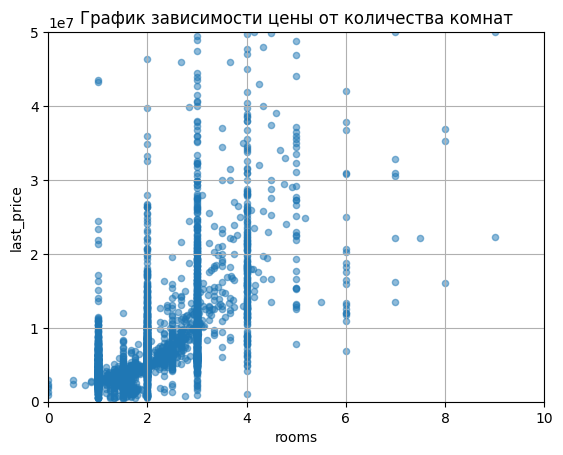

In [73]:
# коэффициент корреляции между ценой и количеством комнат
print('Коэффициент корреляции ' + str(data['last_price'].corr(data['rooms'])))
(
# построим график зависимости цены от количества комнат
data.pivot_table(index='last_price', values='rooms').reset_index()
    .plot(x='rooms', y='last_price', kind='scatter', alpha=0.5, xlim=(0, 10), ylim=(0, 50000000), grid=True)
)
plt.title('График зависимости цены от количества комнат')
plt.show()

На графике видна зависимость цены от количества комнат: чем комнат больше, тем выше стоимость объекта недвижимости. Коэффициент корреляции также подтверждает взаимосвязь этих величин, хотя эта связь и слабее рассмотренных выше. 

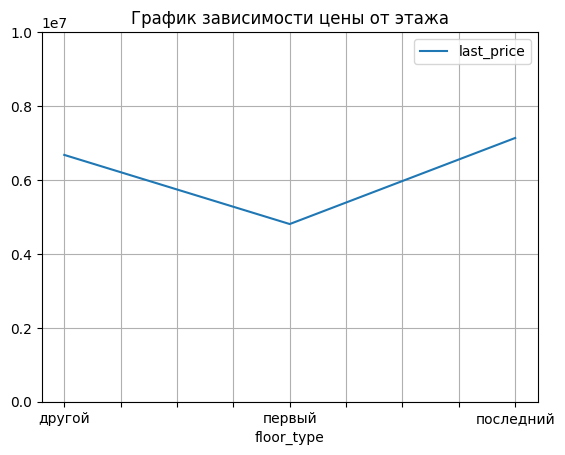

In [74]:
# график зависимости цены от типа этажа (считаем по средней)
(
data.pivot_table(index='floor_type', values='last_price').reset_index()
    .plot(x='floor_type', y='last_price', ylim=(0, 10000000), grid=True)
)
plt.title('График зависимости цены от этажа')
plt.show()

На графике видно, что объекты недвижимости, расположенные на первом этаже, в среднем стоят дешевле (примерно, на 1 млн рублей) объектов, расположенных на других этажах.

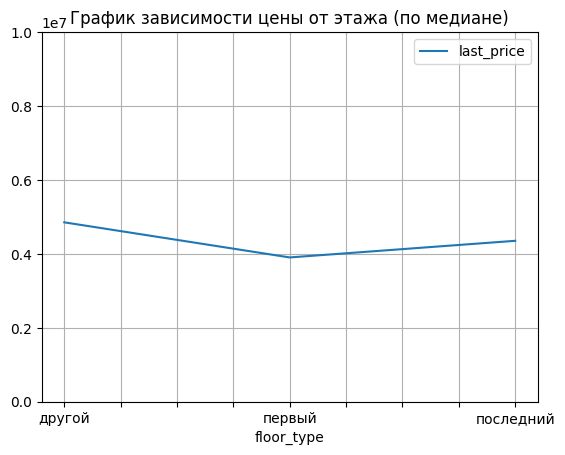

In [75]:
# график зависимости цены от типа этажа (считаем по медиане)
(
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
    .plot(x='floor_type', y='last_price', ylim=(0, 10000000), grid=True)
)
plt.title('График зависимости цены от этажа (по медиане)')
plt.show()

Если считать зависимость цены квартиры от этажа по мединане, то увидим, что первый и последний этажи стоят дешевле, чем средние.

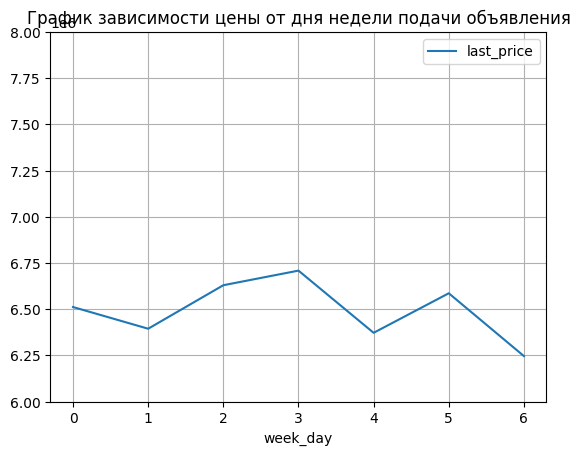

In [76]:
# график зависимости цены от дня недели подачи объявления 
(
data.pivot_table(index='week_day', values='last_price').reset_index()
    .plot(x='week_day', y='last_price', ylim=(6000000, 8000000), grid=True)
)
plt.title('График зависимости цены от дня недели подачи объявления')
plt.show()

По графику можно определить, что самые дорогие объекты недвижимости выставляются по четвергам, чуть дешевле - по средам и субботам, а самые дешевые - по воскресеньям. 

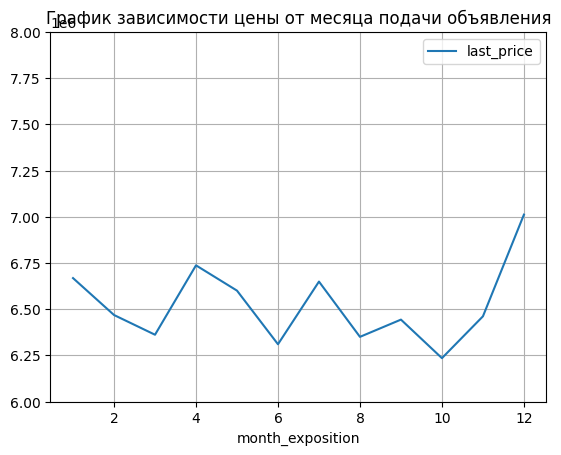

In [77]:
# график зависимости цены от месяца подачи объявления
(
data.pivot_table(index='month_exposition', values='last_price').reset_index()
    .plot(x='month_exposition', y='last_price', ylim=(6000000, 8000000), grid=True)
)
plt.title('График зависимости цены от месяца подачи объявления')
plt.show()

На данном графике можно отследить, что с наступлением холодной осени (с октября) стоимость недвижимости начинает расти и достигает максимума в декабре, после чего плавно снижается до марта, а затем резко дорожает в апреле (практически до уровня декабря), а дальше начинает снижаться до июня. Таким образом, цена в течение года меняется: в декабре, апреле, июле принимает пиковые значения, а в марте, июне, августе и октябре - минимальные.

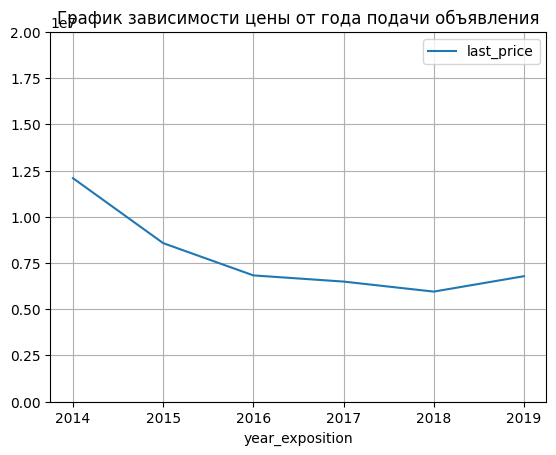

In [78]:
# график зависимости цены от года подачи объявления о продаже
(
data.pivot_table(index='year_exposition', values='last_price').reset_index()
    .plot(x='year_exposition', y='last_price', ylim=(0, 20000000), grid=True)
)
plt.title('График зависимости цены от года подачи объявления')
plt.show()

На первый взгляд просится вывод, что квартиры, продаваемые в последние годы, стали меньше стоить по сравнению с предыдущими годами. Посмотрим, из-за чего такое могло произойти.

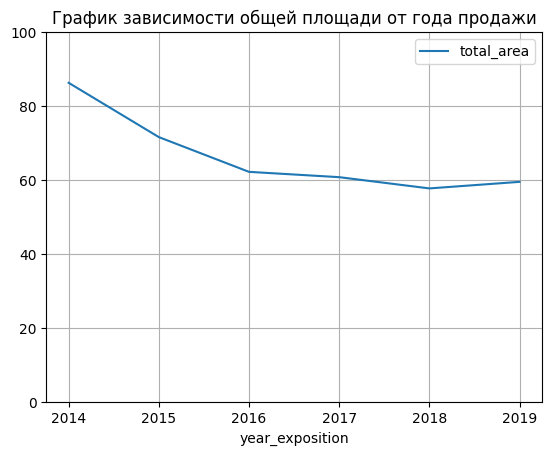

In [79]:
# построим график зависимости общей площади от года продажи
(
data.pivot_table(index='year_exposition', values='total_area').reset_index()
    .plot(x='year_exposition', y='total_area', ylim=(0, 100), grid=True)
)
plt.title('График зависимости общей площади от года продажи')
plt.show()

Оказывается, начиная с 2014 года площадь продаваемых квартир начала снижаться, что в свою очередь повлияло на среднюю стоимость квартир: она тоже с 2014 года начала снижаться.

#### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [80]:
# средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
display(data.groupby('locality_name_clean').agg({'is_apartment':'count', 'price_square_meter':'median'}) \
    .sort_values(by = 'is_apartment', ascending = False) \
    .head(10))

,is_apartment,price_square_meter
locality_name_clean,,
Санкт-Петербург,15719,104761.90
поселок Мурино,556,85878.46
поселок Шушары,440,76876.17
Всеволожск,398,65789.47
Пушкин,369,100000.00
Колпино,338,74723.75
поселок Парголово,327,91642.86
Гатчина,307,67796.61
деревня Кудрово,299,91860.47


Мы посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая низкая стоимость квадратного метра получилась в Выборге (58158.32 рублей), а самая высокая - в Санкт-Петербурге (104761.90 рублей).

#### Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

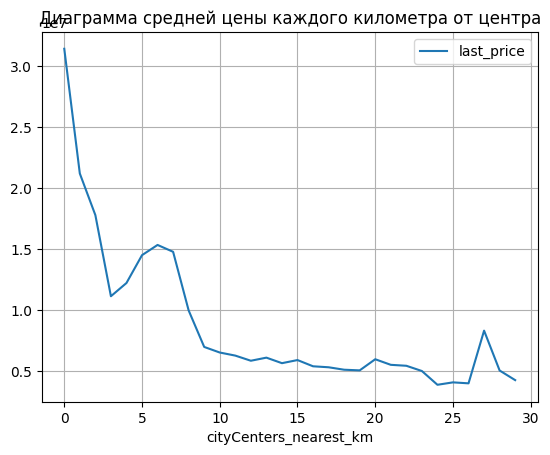

In [81]:
(
data.query('locality_name_clean == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index()
    .plot(x='cityCenters_nearest_km', y='last_price', grid=True, title = 'Заголовок')
)
plt.title('Диаграмма средней цены каждого километра от центра')
plt.show()

На данной линейной диаграмме мы можем проследить, как меняется средняя цена каждого километра в зависимости от удаленности от центра: для объектов, удаленных менее чем на 8 км от центра, цена каждого километра заметно выше, чем для объектов, удаленных на расстояния более 8 км. Причем, стоимость объектов, удаленных на расстояния более 8 км от центра, практически не меняется или меняется незначительно с увеличением расстояни до центра.

### Общий вывод

Для качественного исследования нам требовалось изучить данные и выполнить их предобработку, а именно: заполнить пропуски, избавиться от дубликатов, очистить от редких и аномальных значений и изменить тип данных, где это требовалось.


Мы заполнили пропуски в колонках floors_total, ceiling_height, living_area, balcony, is_apartment, locality_name. Причем, для заполнения пропусков в столбцах ceiling_height и living_area мы использовали имеющиеся в датасете величины. То есть находили закономерности для известных и искомых величин, а затем использовали эту закокномерность для рассчета пропущенных значений.  


Пропуски в других колонках (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) касаются географического расположения объекта недвижимости, которые мы не можем заполнить на основе имеющихся данных, поэтому оставили их без изменений.


Возможными причинами появления пропусков могли быть: невнимательность продавца при вводе данных, нежелание продавца указывать эти данные, недостаток информации об объекте недвижимости (например, продавец не знает высоту потолков в квартире), необязательное поле для ввода данных.


Также мы изменили тип даных в некоторых столбцах: вещественный тип в колонках floors_total и balcony заменили на целый, а в коллонках is_apartment и locality_name на логический и строковый соответственно.


Важным и кропотливым этапом была очистка данных от дубликатов. Благодаря обработке данных мы смогли снизить количество уникальных значений в колонке locality_name с 365 до 319. 

Последним этапом предобработки была очистка данных от редких и аномальных значений. Мы удалили крайние значения столбца last_price, так как эти данные могли исказить результаты дальнейшего исследования.

Для дальнейшего исследования данных мы добавили столбцы с дополнительной информацией: цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах.

Проведя исследовательский анализ данных, мы пришли к следующим выводам:
- обычно продажа занимает от 0 до 514 дней; продажи до 45 дней можно считать быстрыми; а свыше 232 дней - необычно долгими.
- коэффициент корреляции между ценой и общей площадью = 0.70, то есть имеется прямая сильная связь этих величин; на графике зависимости этих величин также можно отследить, что чем больше площадь, тем выше цена объекта недвижимости. 
- коэффициент корреляции между ценой и общей площадью = 0.63, то есть имеется прямая сильная связь этих величин; на графике зависимости этих величин также можно отследить, что чем больше жилая площадь, тем выше цена объекта недвижимости. 
- на графике зависимости цены от площади кухни также видна прямая зависимость: чем больше площадь, тем выше цена объекта; коэффициент корреляции = 0.52.
- стоимость недвижимости также связана с количеством комнат: чем больше комнат, тем выше цена; коэффициент корреляции = 0.39, он меньше, чем предыдущие коэффициенты, следовательно, зависимость цены от количества комнат слабее, чем от площади.
- на графике зависимости стоимости от типа этажа видно, что объекты недвижимости, расположенные на первом этаже, в среднем стоят дешевле (примерно, на 1 млн рублей) объектов, расположенных на других этажах.
- по графику зависимости цены от дня недели можно определить, что самые дорогие объекты недвижимости выставляются по четвергам, чуть дешевле - по субботам, а самые дешевые - по воскресеньям.
- на графике зависимости стоимости от месяца можно отследить, что с наступлением холодной осени (с октября) стоимость недвижимости начинает расти и достигает максимума в декабре, после чего плавно снижается до марта, а затем резко дорожает в апреле (практически до уровня декабря), а дальше начинает снижаться до июня; таким образом, цена в течение года меняется: в декабре, апреле, июле принимает пиковые значения, а в марте, июне, августе и октябре - минимальные.
- на графике зависимости стоимости объекта недвижимости от года выставления на продажу можно увидеть, что, начиная с 2014 года средняя стоимость недвижимости падала вплоть до 2018 года, после чего начала плавно повышаться и в 2019 году достигла уровня цен 2016 года. Это связано с тем, что с 2014 года площадь продаваемых квартир начала снижаться, что в свою очередь повлияло на среднюю стоимость квартир: она закономерно тоже начала снижаться с 2014 года.
- Еще мы посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая низкая стоимость квадратного метра получилась в Гатчине (10507.25 рублей), а самая высокая - в Санкт-Петербурге (1736842.11 рублей).
- Также мы выделили квартиры в Санкт-Петербурге и вычислили среднюю цену каждого километра. А именно, как меняется средняя цена каждого километра в зависимости от удаленности от центра: для объектов, удаленных менее чем на 8 км от центра, цена каждого километра заметно выше, чем для объектов, удаленных на расстояния более 8 км. Причем, стоимость объектов, удаленных на расстояния более 8 км от центра, практически не меняется или меняется незначительно с увеличением расстояни до центра.
